# Week 1 (Import Library, and doing some EDA)

## Import Library and Setup Kagle

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from wordcloud import WordCloud
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')
# Define folder path on Google Drive
folder_path = '/content/drive/MyDrive/Dataset/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Define dataset path within the folder
dataset_path = folder_path + 'TMDB_movie_dataset_v11.csv'

# Read the dataset
df = pd.read_csv(dataset_path)
df.head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."


## Exploratory Data Analysis (EDA)

In [3]:
# Displays the columns in dataframe
print(df.columns)

# Removing movie that has the "adult" feature TRUE
df = df[df['adult'] != True]

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')


In [4]:
# Selecting column(s) that will be use for the model to work and store it to new variable
movies = df[['title', 'overview', 'genres', 'tagline', 'keywords', 'vote_average', 'popularity']]
movies.head(3)

,title,overview,genres,tagline,keywords,vote_average,popularity
0,Inception,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",Your mind is the scene of the crime.,"rescue, mission, dream, airplane, paris, franc...",8.364,83.952
1,Interstellar,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",Mankind was born on Earth. It was never meant ...,"rescue, future, spacecraft, race against time,...",8.417,140.241
2,The Dark Knight,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",Welcome to a world without rules.,"joker, sadism, chaos, secret identity, crime f...",8.512,130.643


In [5]:
# Obtaining overview of dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945749 entries, 0 to 1042778
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   title         945738 non-null  object 
 1   overview      772146 non-null  object 
 2   genres        636420 non-null  object 
 3   tagline       135796 non-null  object 
 4   keywords      256052 non-null  object 
 5   vote_average  945749 non-null  float64
 6   popularity    945749 non-null  float64
dtypes: float64(2), object(5)
memory usage: 57.7+ MB


In [6]:
# Checking numbers of data that have NaN value
missing_values = movies.isna().sum()
print(missing_values)

title               11
overview        173603
genres          309329
tagline         809953
keywords        689697
vote_average         0
popularity           0
dtype: int64


In [7]:
# Checking the percentage of missing value a.k.a NaN
missing_percentage = (missing_values / len(movies)) * 100
print("Missing Value Percentage :\n", missing_percentage)

Missing Value Percentage :
 title            0.001163
overview        18.356139
genres          32.707304
tagline         85.641433
keywords        72.926009
vote_average     0.000000
popularity       0.000000
dtype: float64


<Figure size 1000x500 with 0 Axes>

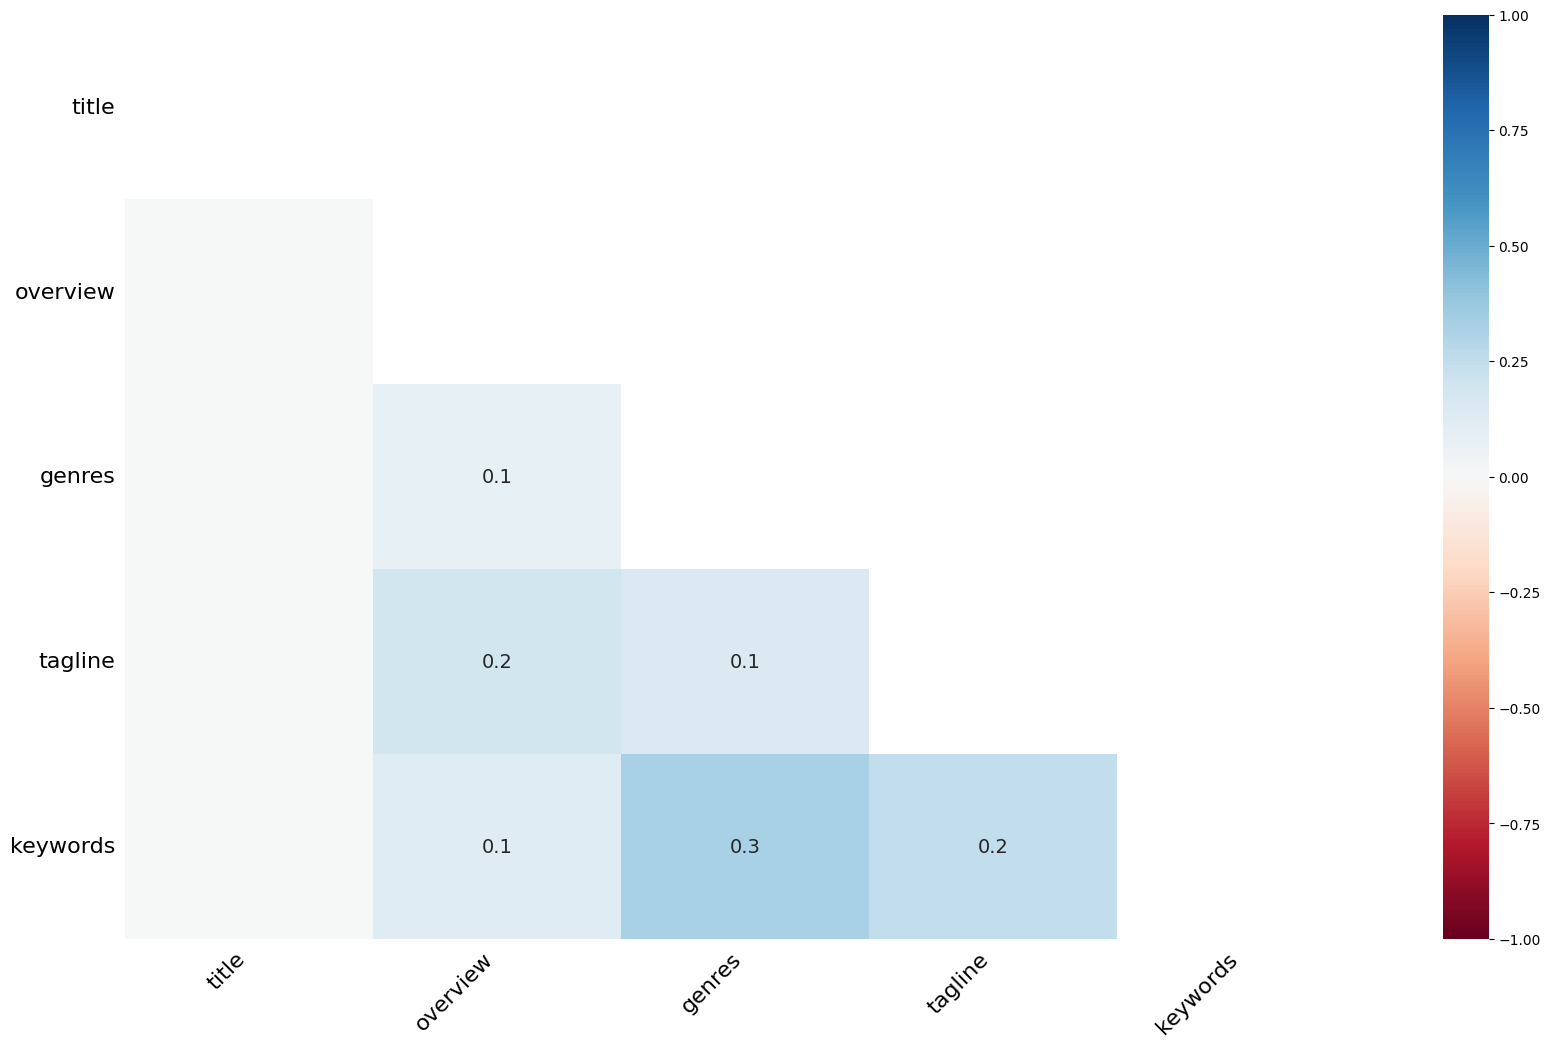

In [8]:
# Visualizing missing values as a heatmap
plt.figure(figsize=(10, 5))
msno.heatmap(movies)
plt.show()

In [9]:
# Checking row(s) that has NaN in it
print(movies[movies.isna().any(axis=1)])

                                                   title  \
107                                        Spirited Away   
110                                           Big Hero 6   
142                                           Black Swan   
183      Birdman or (The Unexpected Virtue of Ignorance)   
225                                       A Star Is Born   
...                                                  ...   
1042774                    Bosko and the Rebirth of Tiki   
1042775                                   Something Love   
1042776                                     Akharin Shab   
1042777                        My Comic Shop DocumentARy   
1042778                                      Dossier 137   

                                                  overview  \
107      A young girl, Chihiro, becomes trapped in a st...   
110      A special bond develops between plus-sized inf...   
142      A journey through the psyche of a young baller...   
183      A fading actor best kn

In [10]:
# Dropping rows where 'genres' is missing
movies = movies.dropna(subset=['genres', 'tagline' ,'overview', 'keywords'])

# Checking if there's still NaN values
movies.isna().sum()

title           0
overview        0
genres          0
tagline         0
keywords        0
vote_average    0
popularity      0
dtype: int64

In [11]:
# Splitting the genres by coma and store it in a list
all_genres = [genre.strip() for sublist in movies['genres'].apply(lambda x: x.split(',')) for genre in sublist]

In [12]:
# Counting the frequency of each genre
genre_counts = Counter(all_genres)

# Convert frequency of each genre to a DataFrame, so that it can be used for plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

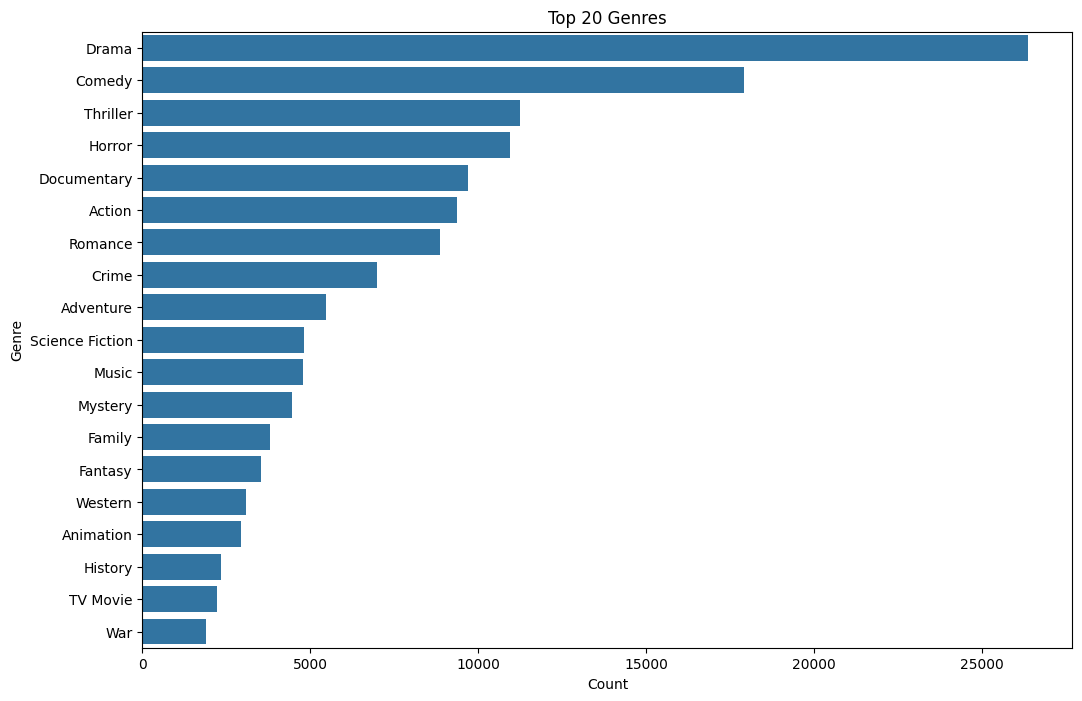

In [13]:
# Plotting the genre distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', data=genre_df.head(20))
plt.title('Top 20 Genres')
plt.show()


overview - Word Count Statistics:
count    70392.000000
mean        48.473704
std         32.145543
min          1.000000
25%         24.000000
50%         40.000000
75%         65.000000
max        194.000000
Name: overview, dtype: float64


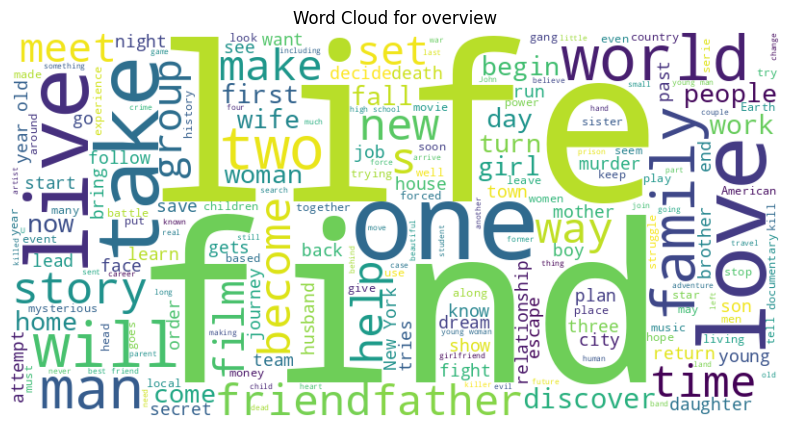


tagline - Word Count Statistics:
count    70392.000000
mean         8.312919
std          5.294893
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max         52.000000
Name: tagline, dtype: float64


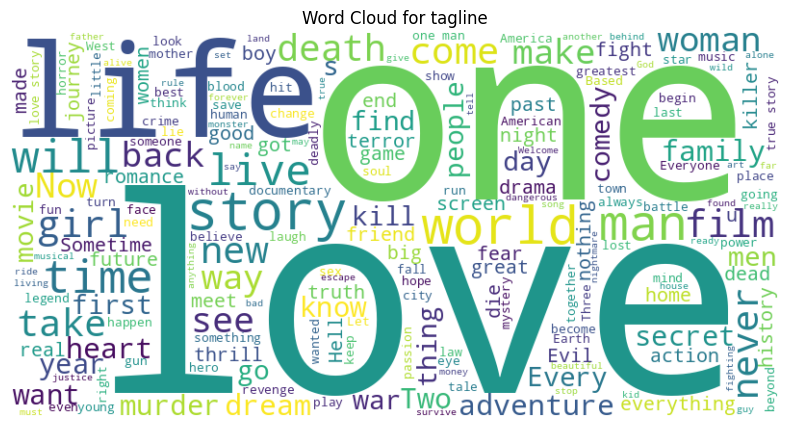


keywords - Word Count Statistics:
count    70392.000000
mean         7.517914
std          7.854167
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max        166.000000
Name: keywords, dtype: float64


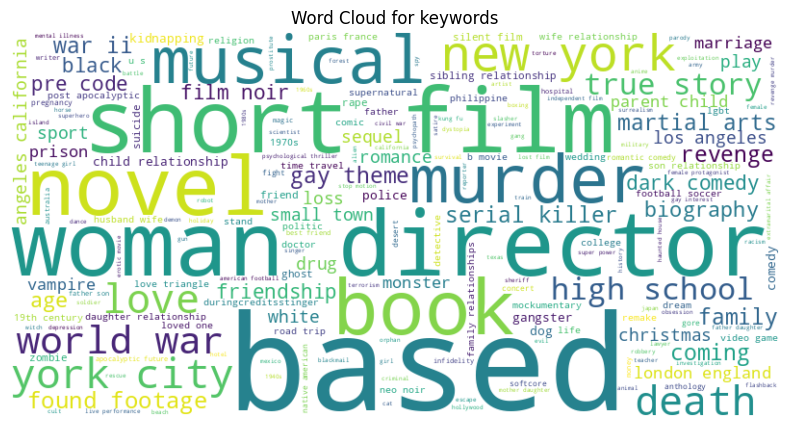

In [14]:
# Analyze Text Data
text_features = ["overview", "tagline", "keywords"]

for feature in text_features:
  word_count = movies[feature].apply(lambda x: len(x.split()))
  print(f"\n{feature} - Word Count Statistics:")
  print(word_count.describe())

  # Generate a Word Cloud for each feature to visualize most common word used
  text = '  '.join(movies[feature].values)
  wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.title(f"Word Cloud for {feature}")
  plt.axis("off")
  plt.show()

# Week 2 (Build Machine Learning model, and then train the model)

## Installing TensorFlow and Importing necesaries libraries for building the model

In [15]:
# Installing TensorFlow
!pip install tensorflow
!pip install --upgrade tensorflow

In [16]:
# Import libraries that will be used for building Machine Learning model
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Dense, Input, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV


2.16.1


## Preparing the data for the model

In [17]:
# Clean and preprocess the data, on overview feature to be exact
def clean_text(text):
  text = text.lower()
  text = text_to_word_sequence(text)
  return ' '.join(text)

movies['clean_overview'] = movies['overview'].apply(clean_text)

# Sample a portion of the data, so the colab's RAM isn't full
movies_sampled = movies.sample(frac=0.1, random_state=42)

# Tokenize overview data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(movies_sampled['clean_overview'])
sequences = tokenizer.texts_to_sequences(movies_sampled['clean_overview'])
max_sequence_length = max([len(seq) for seq in sequences])
X_overview = pad_sequences(sequences, maxlen=max_sequence_length)

# Encode genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(movies_sampled['genres'].str.split(','))

# Split data
X_overview_train, X_overview_test, genres_train, genres_test = train_test_split(X_overview, genres_encoded, test_size=0.2, random_state=42)

## Building the Machine Learning Model

In [28]:
# Define neural network model
def build_model():
  overview_input = Input(shape=(max_sequence_length,))
  embedding_layer = Embedding(input_dim=max_words, output_dim=100)(overview_input)
  conv_layer = Conv1D(128, 5, activation='relu')(embedding_layer)
  conv_layer = BatchNormalization()(conv_layer)
  max_pooling_layer = MaxPooling1D(5)(conv_layer)
  conv_layer = Conv1D(256, 5, activation='relu')(max_pooling_layer)
  conv_layer = BatchNormalization()(conv_layer)
  global_max_pooling_layer = GlobalMaxPooling1D()(conv_layer)


  genres_input = Input(shape=(genres_encoded.shape[1],))
  concatenated = Concatenate()([global_max_pooling_layer, genres_input])
  dense_layer = Dense(512, activation='relu')(concatenated)
  dense_layer = Dense(1024, activation='relu')(concatenated)
  output_layer = Dense(genres_encoded.shape[1], activation='sigmoid')(dense_layer)

  model = Model(inputs=[overview_input, genres_input], outputs=output_layer)

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [30]:
# Learning Rate Scheduler
def lr_scheduler(epoch):
  if epoch < 5:
    return 0.001
  else:
    return 0.0001

history = model.fit([X_overview_train, genres_train],
                      genres_train,
                      epochs=20,
                      batch_size=64,
                      validation_split=0.2,
                      callbacks=[LearningRateScheduler(lr_scheduler), EarlyStopping(patience=5, restore_best_weights=True)]
                      )

model.save("model.h5")

Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 245ms/step - accuracy: 0.6274 - loss: 0.0041 - val_accuracy: 0.0772 - val_loss: 1.8542 - learning_rate: 0.0010
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 216ms/step - accuracy: 0.5839 - loss: 0.0190 - val_accuracy: 0.5271 - val_loss: 0.3881 - learning_rate: 0.0010
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 214ms/step - accuracy: 0.5942 - loss: 0.0037 - val_accuracy: 0.6007 - val_loss: 0.0444 - learning_rate: 0.0010
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 258ms/step - accuracy: 0.6123 - loss: 0.0011 - val_accuracy: 0.5608 - val_loss: 0.0240 - learning_rate: 0.0010
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 213ms/step - accuracy: 0.6455 - loss: 4.9750e-04 - val_accuracy: 0.5563 - val_loss: 0.0255 - learning_rate: 0.0010
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 0.6447 - loss: 3.1708e-04 - val_accuracy: 0.5484 - val_loss: 0.0352 - learning_rate: 1.0000e-04
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 215ms/step - accuracy: 0.636

In [31]:
# Function to recommend movies based on overview similarity
def recommend_by_overview(movie_title, num_recommendation=5):

  # Find the index of the movie in the dataset
  movie_index = movies.index[movies['title'] == movie_title]
  if len(movie_index) == 0:
        print("Movie not found in the dataset.")
        return []
  movie_index = movie_index[0]

  # Calculate the similarity scores between the overview of the given movie and all other movies
  overview_similarity_scores = cosine_similarity(X_overview[movie_index].reshape(1, -1), X_overview)

  # Get the indices of movies sorted by similarity score (exclude the movie given by user)
  similar_overview_movie_indices = np.argsort(overview_similarity_scores[0])[::-1][1:num_recommendation+1]

  # Get the titles of recommended movies
  recommended_movies = movies.iloc[similar_overview_movie_indices][['title', 'overview', 'genres']].values.tolist()
  return recommended_movies

In [32]:
# Function to recommend movies based on genre similarity
def recommend_by_genre(movie_title, num_recommendation=5):
    # Find the index of the movie in the dataset
    movie_index = movies.index[movies['title'] == movie_title]
    if len(movie_index) == 0:
        print("Movie not found in the dataset.")
        return []
    movie_index = movie_index[0]

    # Calculate the similarity scores between the genres of the given movie and all other movies
    genre_similarity_scores = cosine_similarity(genres_encoded[movie_index].reshape(1, -1), genres_encoded)

    # Get the indices of movies sorted by similarity score (exclude the movie given by user)
    similar_genre_movie_indices = np.argsort(genre_similarity_scores[0])[::-1][1:]

    # Extract the recommended movies
    recommended_movies = movies.iloc[similar_genre_movie_indices][['title', 'overview', 'genres', 'vote_average', 'popularity']]

    # Sort the recommended movies by vote_average and popularity
    recommended_movies = recommended_movies.sort_values(by=['vote_average', 'popularity'], ascending=False).head(num_recommendation)

    # Convert the recommended movies to a list of lists
    return recommended_movies.values.tolist()

In [33]:
# Example usage (By Overview):
movie_title = "Avatar"
overview_recommendations = recommend_by_overview(movie_title)
print("Recommendations based on Overview Similarity:")
for movie in overview_recommendations:
    print("Title:", movie[0])
    print("Overview:", movie[1])
    print("Genres:", movie[2])
    print()

Recommendations based on Overview Similarity:
Title: Vacation
Overview: Hoping to bring his family closer together and to recreate his childhood vacation for his own kids, a grown up Rusty Griswold takes his wife and their two sons on a cross-country road trip to the coolest theme park in America, Walley World. Needless to say, things don't go quite as planned.
Genres: Comedy

Title: Peaceful Warrior
Overview: A chance encounter with a stranger changes the life of a college gymnast.
Genres: Drama

Title: To Live and Die in L.A.
Overview: A fearless Secret Service agent will stop at nothing to bring down the counterfeiter who killed his partner.
Genres: Crime, Thriller, Action

Title: The Girl with the Dragon Tattoo
Overview: Swedish thriller based on Stieg Larsson's novel about a male journalist and a young female hacker. In the opening of the movie, Mikael Blomkvist, a middle-aged publisher for the magazine Millennium, loses a libel case brought by corrupt Swedish industrialist Hans-E

In [34]:
# Example usage (By Genres):
movie_title = "Avatar"
genre_recommendations = recommend_by_genre(movie_title)
print("Recommendations based on Genre Similarity:")
for movie in genre_recommendations:
    print("Title:", movie[0])
    print("Overview:", movie[1])
    print("Genres:", movie[2])
    print("vote_average:", movie[3])
    print("popularity:", movie[4])
    print()

Recommendations based on Genre Similarity:
Title: The Godfather
Overview: Spanning the years 1945 to 1955, a chronicle of the fictional Italian-American Corleone crime family. When organized crime family patriarch, Vito Corleone barely survives an attempt on his life, his youngest son, Michael steps in to take care of the would-be killers, launching a campaign of bloody revenge.
Genres: Drama, Crime
vote_average: 8.707
popularity: 158.448

Title: The Shawshank Redemption
Overview: Framed in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his accounting skills to work for an amoral warden. During his long stretch in prison, Dufresne comes to be admired by the other inmates -- including an older prisoner named Red -- for his integrity and unquenchable sense of hope.
Genres: Drama, Crime
vote_average: 8.702
popularity: 122.61

Title: The Godfather Part II
Overview: In the continuing saga of